<a href="https://colab.research.google.com/github/anshikavit/cat_vs_dog-classifier/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 23.7MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.4MB/s]


In [ ]:
import zipfile

# Open the zip file
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all contents
zip_ref.extractall('/content')

# Close the zip file
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
#generator
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 128)      

In [ ]:
model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 54s 84ms/step - loss: 0.6240 - accuracy: 0.6579 - val_loss: 0.5434 - val_accuracy: 0.7222
Epoch 2/10
625/625 [==============================] - 58s 93ms/step - loss: 0.4865 - accuracy: 0.7630 - val_loss: 0.5040 - val_accuracy: 0.7614
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3709 - accuracy: 0.8339 - val_loss: 0.5273 - val_accuracy: 0.7618
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2269 - accuracy: 0.9061 - val_loss: 0.6790 - val_accuracy: 0.7910
Epoch 5/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1180 - accuracy: 0.9540 - val_loss: 0.7981 - val_accuracy: 0.7778
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0702 - accuracy: 0.9748 - val_loss: 1.0671 - val_accuracy: 0.7884
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0506 - accuracy: 0.9822 - val_loss: 1.1668 - val_accuracy:

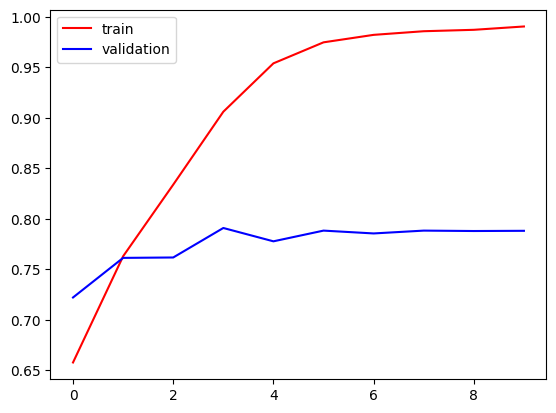

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/street baby cat.jpeg')

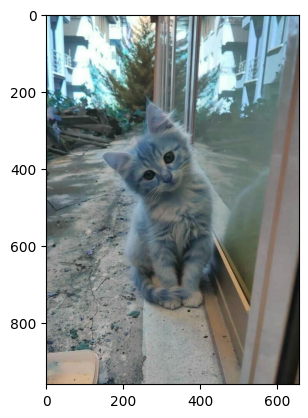

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(960, 656, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input= test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)